Changed the ```init()``` call to remove all parameters and changed the score function to ```ref2015```. Take the output from ```nluc_fpdock_test1.ipynb``` and look to see if we get a correlation with KD as expected.

In [2]:
from os import listdir
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
l = listdir("./decoys/")
fascs = []
for f in l:
    if ".fasc" in f:
        if "20210320-104826" in f:
            fascs.append(f)

print(fascs)

['native_test-20210320-104826_1.fasc', 'peptide128-20210320-104826_2.fasc', 'peptide128-20210320-104826_1.fasc', 'peptide99-20210320-104826_1.fasc', 'peptide101-20210320-104826_1.fasc', 'peptide114-20210320-104826_2.fasc', 'peptide78-20210320-104826_2.fasc', 'peptide114-20210320-104826_1.fasc', 'peptide79-20210320-104826_1.fasc', 'peptide101-20210320-104826_2.fasc', 'peptide86-20210320-104826_2.fasc', 'native_test-20210320-104826_2.fasc', 'peptide78-20210320-104826_1.fasc', 'peptide104-20210320-104826_1.fasc', 'peptide99-20210320-104826_2.fasc', 'peptide79-20210320-104826_2.fasc', 'peptide86-20210320-104826_1.fasc', 'peptide104-20210320-104826_2.fasc']


In [4]:
data = pd.read_json("./decoys/"+fascs[0], orient='records', lines=True)

for f in fascs[1:]:
    d = pd.read_json("./decoys/"+f, orient='records', lines=True)
    data = data.append(d)

data.shape

(900, 24)

In [6]:
peptide_names = []
for i, r in data.iterrows():
    s = r['filename'].split('-')
    s = s[0].split('/')
    name = s[2]
    peptide_names.append(name)
    
data['peptide'] = peptide_names
data.head()

,pdb_name,decoy,filename,nstruct,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,...,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,total_score,yhh_planarity,peptide
0,./decoys/native_test-20210320-104826_1,./decoys/native_test-20210320-104826_1_21.pdb,./decoys/native_test-20210320-104826_1_21.pdb,50,0,-947.361216,345.12464,-270.503209,2.160265,34.026548,...,-32.474634,-15.321732,38.194233,-35.100318,18.324089,6.872419,86.77707,603.212908,0,native_test
1,./decoys/native_test-20210320-104826_1,./decoys/native_test-20210320-104826_1_8.pdb,./decoys/native_test-20210320-104826_1_8.pdb,50,0,-947.361216,345.12464,-270.503209,2.160265,34.026548,...,-32.474634,-15.321732,38.194233,-35.100318,18.324089,6.872419,86.77707,603.212908,0,native_test
2,./decoys/native_test-20210320-104826_1,./decoys/native_test-20210320-104826_1_1.pdb,./decoys/native_test-20210320-104826_1_1.pdb,50,0,-947.361216,345.12464,-270.503209,2.160265,34.026548,...,-32.474634,-15.321732,38.194233,-35.100318,18.324089,6.872419,86.77707,603.212908,0,native_test
3,./decoys/native_test-20210320-104826_1,./decoys/native_test-20210320-104826_1_36.pdb,./decoys/native_test-20210320-104826_1_36.pdb,50,0,-947.361216,345.12464,-270.503209,2.160265,34.026548,...,-32.474634,-15.321732,38.194233,-35.100318,18.324089,6.872419,86.77707,603.212908,0,native_test
4,./decoys/native_test-20210320-104826_1,./decoys/native_test-20210320-104826_1_0.pdb,./decoys/native_test-20210320-104826_1_0.pdb,50,0,-947.361216,345.12464,-270.503209,2.160265,34.026548,...,-32.474634,-15.321732,38.194233,-35.100318,18.324089,6.872419,86.77707,603.212908,0,native_test


In [10]:
kds = {'peptide86':0.7E-9,
       'peptide78':3.4E-9,
       'peptide79':8.5E-9,
       'peptide99':1.8E-7,
       'peptide128':2.8E-7,
       'native_test':0.9E-6,
       'peptide104':1.3E-6,
       'peptide101':2.5E-6,
       'peptide114':1.9E-4
       }

peptides = set(data['peptide'])
dfs = []

for peptide in peptides:
    subdata = data[data['peptide']==peptide]
    subdata['kds'] = kds[peptide]
    
    stdev_total_score = np.std(subdata['total_score'])
    mean_total_score = np.mean(subdata['total_score'])
    print("{}: {} plus minus {}".format(peptide, mean_total_score, stdev_total_score))

    threshold_total_score = mean_total_score - stdev_total_score

    #dfs.append(subdata[subdata['total_score']<threshold_total_score])
    dfs.append(subdata.sort_values('total_score')[:10])

peptide104: 24.24308077052019 plus minus 7.105427357601002e-15
peptide78: 898.3101391074067 plus minus 1.5916157281026244e-12
peptide86: 19.113066273604378 plus minus 4.618527782440651e-14
peptide114: 117.57973454014596 plus minus 1.7053025658242404e-13
peptide79: 885.6935566061583 plus minus 2.2737367544323206e-13
peptide101: 27.549881690478284 plus minus 1.7763568394002505e-14
peptide128: 22.956458937086104 plus minus 6.394884621840902e-14
native_test: 603.2129075366543 plus minus 1.3642420526593924e-12
peptide99: 96.45737729247762 plus minus 9.947598300641403e-14


/home/colin/anaconda3/envs/pyrosetta/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
significant_structures = pd.concat(dfs)
significant_structures.shape

(90, 26)

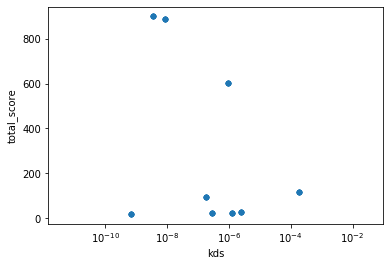

In [12]:
significant_structures.plot('kds', 'total_score', kind='scatter', logx=True)

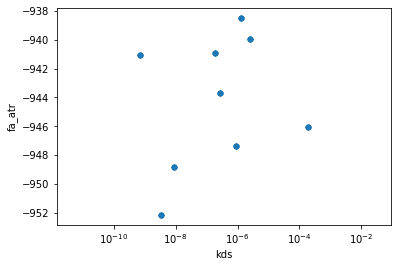

In [13]:
significant_structures.plot('kds', 'fa_atr', kind='scatter', logx=True)

In [14]:
# Try the Spearman correlation
significant_structures.corr('spearman')['kds']

nstruct                     NaN
dslf_fa13                   NaN
fa_atr                 0.383333
fa_dun                 0.000000
fa_elec                0.316667
fa_intra_rep          -0.066667
fa_intra_sol_xover4   -0.416667
fa_rep                -0.133333
fa_sol                -0.166667
hbond_bb_sc           -0.638291
hbond_lr_bb            0.008368
hbond_sc                    NaN
hbond_sr_bb                 NaN
lk_ball_wtd            0.150000
omega                 -0.300000
p_aa_pp                0.333333
pro_close                   NaN
rama_prepro            0.200000
ref                   -0.333333
total_score           -0.050000
yhh_planarity               NaN
kds                    1.000000
Name: kds, dtype: float64

Hmm. Maybe need to look back at those ```init()``` parameters. It looks like this ran A LOT faster, but lost a lot of predictive performance. And now, ```total_score``` has a huge amount of variance. What were the init parameter for the alanine scan code?